## Introduction to Tensorflow and Visualization in CNN

This tutorial introduces Tensorflow, an open-source software library for dataflow programming across a range of tasks. Tensorflow is very widely used in deep learning. This tutorial will talk about the basic ideas of tensorflow by implementing a convolution neural network on a very famous dataset--the MNIST dataset which aimed at recognizing digital numbers.

## Content

I will cover the following topics in this tutorial:

[Environment](#Environment)

[MNIST Dataset](#MNIST-Dataset)

[Load Data and Plotting](#Load-Data-and-Plotting)

[Creating Tensor Variables](#Creating-Tensor-Variables)

[Convolutional Layer](#Convolutional-Layer)

[Pooling Layer](#Pooling-Layer)

[Fully-Connected Layer](#Fully-Connected-Layer)

[Train Model and Test](#Train-Model-and-Test)

[Visualization](#Visualization)

[Visualize Weights Function](#Visualize-Weights-Function)

[Visualize Convolutional Layers Function](#Visualize-Convolutional-Layers-Function)

## Environment

This tutorial uses Python 3.6 and Tensorflow 1.6. In order to install tensorflow, the recommended way is to use Anaconda. First create a conda virtual environment by invoking the following command:

conda create -n tensorflow pip python=3.6

Then activate the conda environment by the following command:

activate tensorflow

After you enter the environment, you can install tensoflow by the following command:

pip install --ignore-installed --upgrade tensorflow

After installing tensorflow, make sure the following commands work for you.

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import math
import sklearn as sk

/Users/morrisqin/anaconda3/envs/tensorflow/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


## MNIST Dataset

The MNIST Dataset is a handwritten digit database which contains a training set of 60,000 examples, a test set of 10,000 examples.

The following picture is a sample image from MNIST test dataset
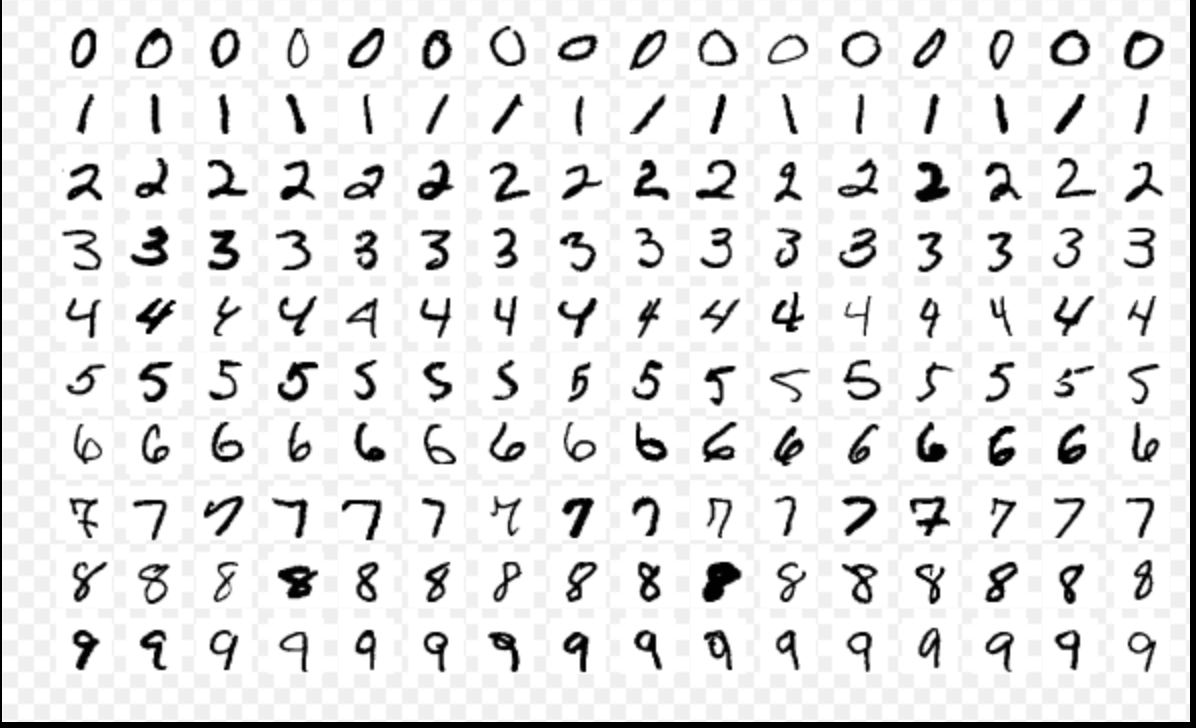

## Load Data and Plotting

The following code will download the MNIST data for you and store it in the MNIST folder

In [2]:
# Import MNIST data
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST/", one_hot=True)

Extracting MNIST/train-images-idx3-ubyte.gz
Extracting MNIST/train-labels-idx1-ubyte.gz
Extracting MNIST/t10k-images-idx3-ubyte.gz
Extracting MNIST/t10k-labels-idx1-ubyte.gz


Use plt.imshow to visualize the MNIST Data, since the pixel of the image is 784, I will use a 28*28 frame to display the data. In order to do that, I need to reshape the image using np.shape function. Here I plot the second image from the training set.

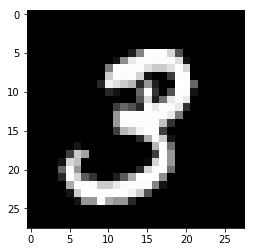

In [3]:
plt.imshow(np.reshape(mnist.train.images[1],[28,28]), interpolation="nearest", cmap="gray")

If we want to find out what's inside the image, we can simply print it out and find that it's actually an array containing numbers from 0 to 1 where 0 means black and 1 means white. And the length of the array is 784, which means it's a $28\times28$ image.

In [4]:
print(mnist.train.images[1])
print(len(mnist.train.images[1]))

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         

## Creating Tensor Variables

They first step of constructing a convolustional nerual network is to create variables that represent the input and the label.

In [5]:
# the pixels of the image
pixel = 784

# number of classes
classes = 10

# image input
input_x = tf.placeholder(tf.float32, [None, pixel])

# image label
labels = tf.placeholder(tf.float32, [None, classes])

Here I use a tf.placeholder function to create a variable. The advantage of using tf.placeholder is that I don't need to initialize the variable. Instead, I can specify it at run time when I start to train the model.

## Convolutional Layer

The Convolutional layer is the core building block of a Convolutional Network that does most of the computational heavy lifting. In convolutional layer, we often have a filter which is of certain width and height, and we are going to slide each filter across the width and height of the input image and compute dot products between the filter and the input iamge at any position.

So the a single cell of the output in the the dot products between the filter and the input image is as follows:

$$cell=\sum_{i}^\ w_ix_i+b$$

Here b is a bias term.

And the whole output is the combination of sliding the filter across the width and height of the input image and computes the value of each cell using the equation above.

After getting the convolutional results, we are going to pass it throught the activation function. The most widely used activation function is the RELU function which makes the data non-linear.

$$f(x)=max(0,x)$$

The figure of this function is as follows:

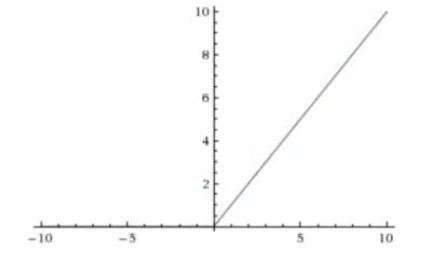

Now I am going to apply convolutional layer to our MNIST data. Notice our input_x is now a 784 pixel image, if I want it to have a dot product with filter, I need to reshape it to make it a $28\times28$ image. The tf.reshape function will help me do the reshape procedure here.

In [6]:
reshaped_image = tf.reshape(input_x, [-1, 28, 28, 1])

Now we have a reshaped_image, the first dimension means the number of examples we have and I set it to -1 meaning that we allow multiple numbers of examples. The second and the third dimension is the height and width of the image. And the fourth dimension is the channel of the image. If it's a grayscale image, its value is 1, if it's a RGB image, its value is 3.

Next I'm going to create the filter_weights variable using the tf.Variable function. I want to make the weight random by introducing the tf.random_normal function and pass the shape of the weight into the argument. The shape should be [filter_weight, filter_height, channels, filter_numbers]

In [7]:
first_filter_size = 5
first_filter_numbers = 32
first_filter_weights = tf.Variable(tf.random_normal([first_filter_size, first_filter_size, reshaped_image.get_shape()[3].value, first_filter_numbers]))
first_bias = tf.Variable(tf.random_normal([first_filter_numbers]))

Okay now all the preparation is done!! I just need to pass all those parameters along to tf.nn.conv2d function as arguments. The function will compute the 2-D convolution given the 4-D input_image and weights.

In [8]:
first_conv_layer = tf.nn.conv2d(reshaped_image, first_filter_weights, [1,1,1,1], padding="SAME")

The third argument is the stride which means the stride of the sliding window for each dimension of input. And for padding algorithm we can choose from SAME and VALID.

Next I add the bias term by tf.nn.bias_add function.

In [9]:
first_conv_layer = tf.nn.bias_add(first_conv_layer, first_bias)

Finally I'll pass the conv layer throught an activation function. I used RELU function here.

In [10]:
first_conv_layer = tf.nn.relu(first_conv_layer)

Since we have 32 filters, the shape of the first convolutional layer should be $-1\times28\times28\times32$

In [11]:
print(first_conv_layer.get_shape())

(?, 28, 28, 32)


## Pooling Layer

The pooling layer tries to reduce the spatial size of the representation to reduce the amount of parameters and computation in the network, and hence also control overfitting. Here I use a max pooling layer which means I only extract the max element in every slice of certain width and height.

In [12]:
first_pooling_layer = tf.nn.max_pool(first_conv_layer, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')

We can go through the pooling layer by simpling calling the tf.nn.max_pool function and pass the relative arguments. Ksize means the size of the window, here I set the window to be $2\times2$ meaning that I want to find the max value in among four pixels. Then I set strides to be $2\times2$ accordingly. For padding algorithm I still use 'SAME'.

By applying the max pooling step, the shape of the layer should decrease half in both width and height.

In [13]:
print(first_pooling_layer.get_shape())

(?, 14, 14, 32)


Next let's do another convolutional layer and pooling layer. I'll pass the first pooling layer as the input for the second convolutional layer. This time I set the filter numbers to be 64.

In [14]:
second_filter_size = 5
second_filter_numbers = 64
second_filter_weights = tf.Variable(tf.random_normal([second_filter_size, second_filter_size, first_pooling_layer.get_shape()[3].value, second_filter_numbers]))
second_filter_bias = tf.Variable(tf.random_normal([second_filter_numbers]))

In [15]:
second_conv_layer = tf.nn.conv2d(first_pooling_layer, second_filter_weights, [1,1,1,1], padding="SAME")

In [16]:
second_conv_layer = tf.nn.bias_add(second_conv_layer, second_filter_bias)

In [17]:
second_conv_layer = tf.nn.relu(second_conv_layer)

In [18]:
print(second_conv_layer.get_shape())

(?, 14, 14, 64)


Now we can see that the shape of the second conv layer is: $-1\times14\times14\times64$ because I set the number of filters to be 64.

In [19]:
second_pooling_layer = tf.nn.max_pool(second_conv_layer, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')

After the max pooling step, the shape should be reduced half in width and height.

In [20]:
print(second_pooling_layer.get_shape())

(?, 7, 7, 64)


## Fully-Connected Layer

Finally, after two convolutional and max pooling layers, the high-level reasoning in the neural network is done via fully connected layers. Neurons in a fully connected layer have connections to all activations in the previous layer, as seen in regular neural networks.

Just like what we usually do in common neural networks, the way to compute each neuron is as follows:

$$output_i=f(\sum_{i=0}^nw_ix_i+b)$$

Here f can be any activation function, e.g: RELU function.

So the first thing we want to do in fully-connected layer is to flatten the output from pooling layer so that we know the number of neurons in this layer.

Let's write a function to get the number of neurons in the layer first.

In [21]:
def get_num_of_neurons(layer):
    all_shape = layer.get_shape()
    num_neurons = 1
    for i in range(1, len(all_shape)):
        num_neurons *= all_shape[i].value
    return num_neurons

In [22]:
num_of_neurons = get_num_of_neurons(second_pooling_layer)
print(num_of_neurons)

3136


As you can see, the number of neurons is 3136 which is exactly $7\times7\times64$

Next I'm going to create a varible input, weight and bias as we did in the convolutional step.

In [23]:
fully_connected_input = tf.reshape(second_pooling_layer, tf.stack([-1, num_of_neurons]))

In [24]:
print(fully_connected_input.get_shape())

(?, 3136)


Now we have our fully-connected input of shape ?$\times3136$, ? means that we don't know the number of training examples now.

In [25]:
fully_connected_weights = tf.Variable(tf.random_normal(shape=[num_of_neurons, 1024]))

In [26]:
fully_connected_bias = tf.Variable(tf.random_normal(shape=[1024]))

In [27]:
fully_connected_output = tf.add(tf.matmul(fully_connected_input, fully_connected_weights), fully_connected_bias)

In [28]:
fully_connected_output = tf.nn.relu(fully_connected_output)

As suggested above, the fully_connected_output should be the matrix multiplication of the input and the weights and then add it to the bias.

Now let's take a look at the shape of the fully_connected_output which should be ?$\times1024$

In [29]:
print(fully_connected_output.get_shape())

(?, 1024)


Finally we want to connect the output to another fully-connected layer which is our final result. So the last layer will have only 10 neurons, each neuron representing the probability of this image categorizing into a number (0-9).

In [30]:
final_num_of_neurons = get_num_of_neurons(fully_connected_output)

In [31]:
final_connected_weights = tf.Variable(tf.random_normal(shape=[final_num_of_neurons, 10]))
final_connected_bias = tf.Variable(tf.random_normal(shape=[10]))

In [32]:
final_connected_output = tf.add(tf.matmul(fully_connected_output, final_connected_weights), final_connected_bias)

Let's look at the shape of the final_connected_output which should be ?$\times10$

In [33]:
print(final_connected_output.get_shape())

(?, 10)


So far, we've built the structure of the convolutional neural network but we have not pass any training data into it. In order to train our model well, we need to first define the loss function which we try to minimize. What we usually do in convolutional neural network is that we define a softmax function. The softmax function is often used in the final layer of a neural network-based classifier. Such networks are commonly trained under cross-entropy regime, giving a non-linear variant of multinomial logistic regression.

For example, if we have K classes, the predicted probability for the j'th class given a sample vector x and a weighting vector w is:

$P(y=j|x)=\frac{e^{x^Tw_j}}{\sum_{k=1}^Ke^{x^Tw_k}}$

In tensorflow we use tf.nn.softmax_cross_entropy_with_logits function to compute softmax cross entropy between logits and labels. The function takes two arguments, the logits and the labels.


In [34]:
softmax = tf.nn.softmax_cross_entropy_with_logits(logits=final_connected_output, labels=labels)

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See tf.nn.softmax_cross_entropy_with_logits_v2.



Now we have our loss function defined below. We use a tf.reduce_mean function to calculate the mean of our softmax value.

In [35]:
loss = tf.reduce_mean(softmax)

Next we will define the optimizer which is used to train a model. There're a lot of optimizer to choose from, including the GradientDescentOptimizer that we learned in class. In this case, we will use a more sophisticated optimizer AdamOptimizer and set the learning rate to 0.001.

In [36]:
optimizer = tf.train.AdamOptimizer(learning_rate=0.001).minimize(loss)

Next we will define the correct prediction and accuracy. The way we compute correct prediction is to find the discrepency between the predicted output and the true label. So in this case the predicted output is the max element in the final_connected_output and the true label is the max element in all the labels.

Then with the variable correct_predictions we can compute the accuracy. We will cast the correct_predictions to an list containing only 0 and 1. For example, if the correct_predictions is [True, False, False, True], then we will cast it to [1,0,0,1]. After that we compute the mean value of this list and get 0.5 as the accuracy.

In [37]:
correct_predictions = tf.equal(tf.argmax(final_connected_output, 1), tf.argmax(labels, 1))
accuracy = tf.reduce_mean(tf.cast(correct_predictions, tf.float32))

I will init all the variables by the following function.

In [38]:
init = tf.global_variables_initializer()

Finally I will train the model using the training data. In tensorflow if we want to start training data we need to do it under a session. Using with tf.Session() as sess, we created a session under which we will perform our optimizer on our training data in order to minimize the loss function. Remember we filled in a placeholder for the variable input_x and labels. Here we will fill the training data into the variable by feed_dict argument in sess.run function. I set the batch size to be 50 training examples at a time and display the accuracy every 100 steps.

## Train Model and Test

I will use accuracy, precision, recall and f1 score as the metrics for training model.

First I will construct the confusion matrix by calling confution_matrix function in scikit-learn library.
Confusion matrix is a table that allows visualization of the performance of the algorithm. Each row of the matrix represents the instances in a predicted class while each column represents the instances in an actual class.

Precision is the number of true positives divided by the number of all predicted positives. Therefore it tells you how many selected items are relevant. It can be calculated by the following equation.
$$Precision=\frac{TP}{TP+FP}$$

Recall is the number of true positives divided by the number of all actual positives. Therefore it tells you how many reletive items are selected. It can be calcuated by the following equation.
$$Recall=\frac{TP}{TP+FN}$$

F1 score considers both precision and recall to compute the score. It can be calcuated by the following equation.
$$F1score=2\times\frac{precision\times recall}{precision+recall}$$

In our case, I pass the argument 'macro' to the precision and recall function to suggest that these two metrics should be calcuated by averaging the precion recall value of all 10 classes.

In [39]:
batch_size = 50
display_step = 100
with tf.Session() as sess:
    sess.run(init)
    # train 5 batches
    for i in range(501):
        # train batch_size of training data at a time
        batch_x, batch_y = mnist.train.next_batch(batch_size)
        # run the optimizer which reduces the loss function
        sess.run(optimizer, feed_dict={input_x: batch_x, labels: batch_y})
        if i % display_step == 0:
            cost, accur = sess.run([loss, accuracy], feed_dict={input_x: batch_x, labels: batch_y})
            print('when Epoch = %d' % i + ' training accuracy = %f'% accur)
    print('training finished')
    print("Testing Accuracy:", sess.run(accuracy, feed_dict={input_x: mnist.test.images[:256], labels: mnist.test.labels[:256]}))
    
    # prediction model
    y_p = tf.argmax(final_connected_output, 1)
    
    # final prediction after feeding the input
    y_pred = sess.run(y_p, feed_dict={input_x: mnist.test.images[:256]})
    
    #f true label model
    true_label = tf.argmax(mnist.test.labels[:256],1)
    
    # final true label after running the session
    y_true = sess.run(true_label)
    
    # confusion matrix
    print('confusion matrix:')
    print(sk.metrics.confusion_matrix(y_true, y_pred))
    
    # precision
    precision = sk.metrics.precision_score(y_true, y_pred, average='macro')
    print('Precision:' ,precision)
    
    # recall
    recall = sk.metrics.recall_score(y_true, y_pred, average='macro')
    print('Recall:', recall)
    
    # f1 score
    f1_score = 2 * precision * recall / (precision + recall)
    print('f1 score:', f1_score)

when Epoch = 0 training accuracy = 0.040000
when Epoch = 100 training accuracy = 0.740000
when Epoch = 200 training accuracy = 0.760000
when Epoch = 300 training accuracy = 0.920000
when Epoch = 400 training accuracy = 0.820000
when Epoch = 500 training accuracy = 0.940000
training finished
Testing Accuracy: 0.921875
confusion matrix:
[[19  0  0  0  0  0  0  0  0  0]
 [ 0 34  0  0  0  0  0  0  0  1]
 [ 0  0 22  0  0  0  0  2  0  0]
 [ 0  0  2 19  0  2  0  0  0  0]
 [ 0  0  1  0 28  0  3  2  0  0]
 [ 0  0  0  0  0 26  0  0  0  0]
 [ 0  0  0  0  0  0 22  0  0  0]
 [ 0  1  1  0  0  0  0 29  0  0]
 [ 1  0  0  0  0  0  0  0 13  0]
 [ 0  0  0  0  0  0  0  1  3 24]]
Precision: 0.9201595022624435
Recall: 0.9258909763063711
f1 score: 0.9230163419668372


## Visualization

### Visualize Weights Function

The first visualization function is to visualize filters. Here we want to map the weights in the filter to the color in an image according to the value of the weight. So first we need to find the maximun and the minimum weights in the filter. And then we will display the weights of the filters in an image.

In [40]:
def plot_conv_filters(filters):
    '''
    Plot the convolutional filters
    '''
    # find the max and the min weights of the filter
    min_filter = np.min(filters)
    max_filter = np.max(filters)

    channels = filters.shape[2]

    num_filters = filters.shape[3]
    
    # specify the columns to display
    columns = 8
    
    # specify the rows to display
    rows = math.ceil(num_filters / columns)

    # split the field into rows and columns defined above in order to display all the filters
    fig, axes = plt.subplots(min([rows, columns]),max([rows, columns]))
    
    
    for channel in range(channels):
        i = 0
        while i < num_filters:
            this_filter = filters[:,:,channel,i]
            axes.flat[i].imshow(this_filter, vmin=min_filter, vmax=max_filter, interpolation='nearest', cmap='seismic')
            axes.flat[i].set_xticks([])
            axes.flat[i].set_yticks([])
            i += 1

Here I will divide the whole area into several separated subarea by using plt.subplots function. In particular, I have set the number of columns to 8, which means there will be 8 figures in one row. And I will calculate the number of rows needed for plotting all the filter weights according to its channel. Finally I will plot the filter in each subarea. 

### Visualize Convolutional Layers Function

The following function plots the convolutional layer. Just like what I did in plot_conv_filters, I will use plt.subplots to plot each convolutional layer in its specific subarea.

In [41]:
def plot_conv_layers(conv_img):
    '''
    Plot the convolutional layer
    '''
    
    min_img = np.min(conv_img)
    max_img = np.max(conv_img)

    num_filters = conv_img.shape[3]
    columns = 8
    rows = math.ceil(num_filters / columns)
    #plt.figure(1, figsize=(30,30))
    # iterate over all the channels
    
    fig, axes = plt.subplots(min([rows, columns]),max([rows, columns]))
    i = 0
    while i < num_filters:
        this_img = conv_img[0,:,:,i]
        axes.flat[i].imshow(this_img, vmin=min_img, vmax=max_img, interpolation='bicubic', cmap='Greys')
        axes.flat[i].set_xticks([])
        axes.flat[i].set_yticks([])
        i += 1

Next we will visualize the filters and the convolutional layers in our mnist dataset. Since the previous session ends. We need to create a new session and train the model again using the training data from the mnist dataset. Note that the order of the display is: 

32 filters in the first layer

64 filters in the second layer

32 convolutional layers in the first layer

32 pooling layers in the first layer

64 convolutional layers in the second layer

64 pooling layers in the second layer

training completed


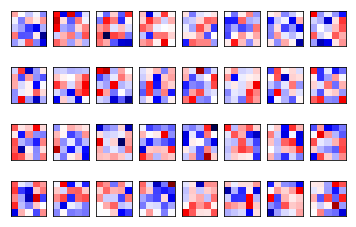

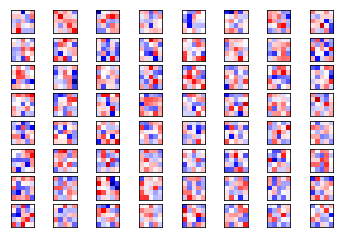

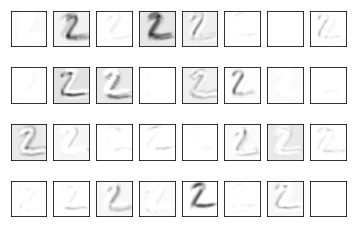

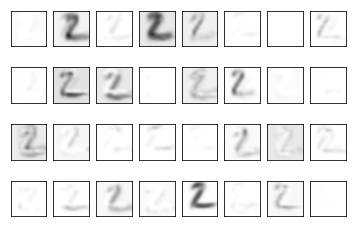

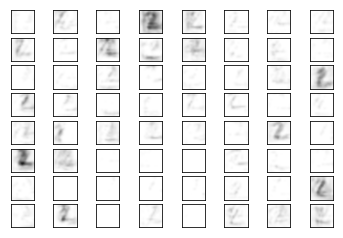

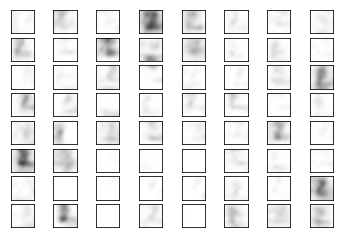

In [42]:
# metrics
with tf.Session() as sess:
    sess.run(init)
    # train 5 batches
    for i in range(501):
        # train batch_size of training data at a time
        batch_x, batch_y = mnist.train.next_batch(batch_size)
        # run the optimizer which reduces the loss function
        sess.run(optimizer, feed_dict={input_x: batch_x, labels: batch_y})
    print('training completed')
    # 32 filters in the first layer
    first_conv_filter = sess.run(first_filter_weights)
    plot_conv_filters(first_conv_filter)
    
    # 64 filters in the second layer
    second_conv_filter = sess.run(second_filter_weights)
    plot_conv_filters(second_conv_filter)
    
    # 32 convolutional layers in the first layer
    first_conv_out_layer = sess.run(first_conv_layer, feed_dict={input_x: np.reshape(mnist.test.images[1], [1, 784])})
    plot_conv_layers(first_conv_out_layer)
    
    # 32 pooling layers in the first layer
    first_conv_out_pooling = sess.run(first_pooling_layer, feed_dict={input_x: np.reshape(mnist.test.images[1], [1, 784])})
    plot_conv_layers(first_conv_out_pooling)
    
    # 64 convolutional layers in the second layer
    second_conv_out_layer = sess.run(second_conv_layer, feed_dict={input_x: np.reshape(mnist.test.images[1], [1, 784])})
    plot_conv_layers(second_conv_out_layer)
    
    # 64 pooling layers in the second layer
    second_conv_out_pooling = sess.run(second_pooling_layer, feed_dict={input_x: np.reshape(mnist.test.images[1], [1, 784])})
    plot_conv_layers(second_conv_out_pooling)